In [1]:
# Cell 1 — Imports

import os, sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib # import for reloading modules after edits

# Import the finance_tools module
import scripts.finance_tools

# Force the script to reload after modifications
importlib.reload(scripts.finance_tools)

# Import the StockAnalyzer class from the reloaded module
from scripts.finance_tools import StockAnalyzer

import pynance as pn

In [2]:
# Cell 2 — Load stock data

# Instantiate the StockAnalyzer class to load and analyze stock data
appl_analyzer = StockAnalyzer(ticker="AAPL", start="2011-05-23", end="2020-06-11")
# Access the DataFrame stored inside the class instance
df_price = appl_analyzer.df
df_price.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2011-05-23,10.029006,10.076392,9.879651,9.896146,383600000
2011-05-24,9.962722,10.073989,9.937229,10.061992,321927200
2011-05-25,10.100381,10.153765,9.982516,9.999911,294224000
2011-05-26,10.047000,10.103683,10.029905,10.076092,222560800
2011-05-27,10.119279,10.125877,10.026307,10.041002,203599200


In [3]:
# Cell 3 — Apply TA-Lib indicators\

# Call the class method to compute indicators
# This updates aapl_analyzer.df internally and returns the updated DataFrame

df_ind = appl_analyzer.add_indicators() 
df_ind.tail()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist
Date,,,,,,,,,,,
2020-06-04,78.164772,78.965041,77.791310,78.666763,87560400,76.524202,70.086362,65.089303,2.190371,2.330917,-0.140546
2020-06-05,80.390984,80.451610,78.385456,78.414555,137250400,76.870745,70.506591,71.075845,2.278336,2.320401,-0.042064
2020-06-08,80.866287,80.900242,79.377300,80.087843,95654400,77.153630,70.873832,72.173013,2.359207,2.328162,0.031045
2020-06-09,83.419868,83.812728,80.514643,80.546170,147712400,77.505021,71.343901,77.181085,2.599386,2.382407,0.216980
2020-06-10,85.566071,86.034107,83.929150,84.368087,166651600,78.007374,71.822697,80.377508,2.929145,2.491755,0.437391


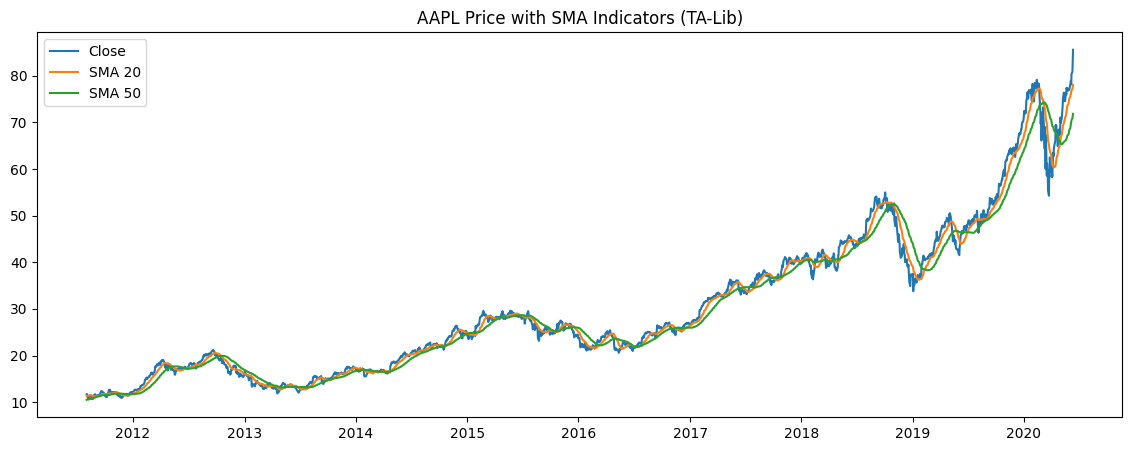

In [4]:
# Cell 4 — Plot SMA

plt.figure(figsize=(14,5))
plt.plot(df_ind.index, df_ind["Close"], label="Close")
plt.plot(df_ind.index, df_ind["SMA_20"], label="SMA 20")
plt.plot(df_ind.index, df_ind["SMA_50"], label="SMA 50")
plt.title("AAPL Price with SMA Indicators (TA-Lib)")
plt.legend()
plt.show()


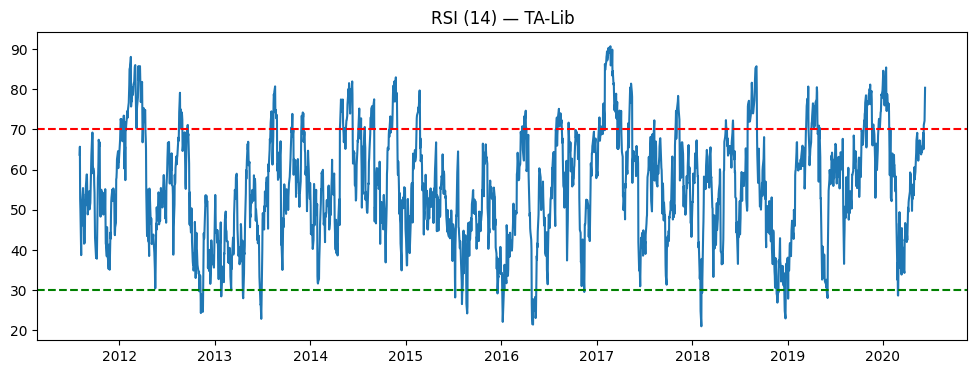

In [5]:
# Cell 5 — Plot RSI

plt.figure(figsize=(12,4))
plt.plot(df_ind.index, df_ind["RSI_14"])
plt.axhline(70, color="red", linestyle="--")
plt.axhline(30, color="green", linestyle="--")
plt.title("RSI (14) — TA-Lib")
plt.show()

In [6]:
# Cell 6 — Calculate Daily Returns 

# Call method. It now updates appl_analyzer.df internally.
stock_returns_df = appl_analyzer.add_returns()
stock_returns_df.head()

Price,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_Signal,MACD_Hist,Return
Date,,,,,,,,,,,,
2011-08-03,11.773582,11.802973,11.463775,11.725895,732508000,11.364416,10.554442,65.701549,0.393527,0.397069,-0.003542,0.009411
2011-08-04,11.317719,11.736094,11.317120,11.678812,871407600,11.394662,10.581542,52.702541,0.340241,0.385704,-0.045463,-0.038719
2011-08-05,11.205254,11.501566,10.873853,11.409793,1204590800,11.415521,10.603639,50.070524,0.285643,0.365691,-0.080049,-0.009937
2011-08-08,10.593141,11.029810,10.587442,10.847464,1143833600,11.414336,10.614562,38.732684,0.190782,0.330710,-0.139927,-0.054627
2011-08-09,11.216949,11.234944,10.646818,10.835762,1082583600,11.444717,10.636515,50.927839,0.164049,0.297378,-0.133328,0.058888


In [7]:
# Cell 7 — Calculate Descriptive Statistics

import numpy as np # Ensure NumPy is imported for calculations

# daily returns 
returns = appl_analyzer.df['Return'] # Use the 'Return' column from the class

# volatility (Annualized: daily stdev * sqrt(252 trading days))
volatility = returns.std() * np.sqrt(252) # Assuming 252 trading days in a year

# print("Daily returns (first 5):")
# print(returns.head())
print("\nAnnualized Volatility:", volatility)


Annualized Volatility: 0.2802272563764755


In [8]:
# Cell 8 — Calculate Sharpe Ratio (Annualized)

# Define a daily risk-free rate (e.g., 1% annual rate / 252 trading days)
risk_free_rate_daily = (0.01 / 252)

# Calculate the Sharpe Ratio (Annualized)
# Formula: (Average Daily Return - Risk Free Rate) / Daily Std Dev * sqrt(252)
sharpe = (returns.mean() - risk_free_rate_daily) / returns.std() * np.sqrt(252)

print("Sharpe Ratio (Annualized):", sharpe)

Sharpe Ratio (Annualized): 0.9093936898836741


In [9]:
# Cell 9 — Load Sentiment Data and Merge (FIXED & DIAGNOSTIC)

import pandas as pd # Import needed for pd.read_csv

# --- Step 1: Prepare Stock Data Date Index ---
# Ensure the stock data index is a perfect Date object (no time component).
# We assume stock_returns_df was correctly created in Cell 6.
print("Stock Returns Date Index (Before Fix):", stock_returns_df.index.dtype)

# Apply normalization: convert to datetime if needed, then strip the time component.
stock_returns_df.index = pd.to_datetime(stock_returns_df.index).normalize() 
# Overwrite the stock_returns_df variable with the date-normalized version
stock_returns_df.index.name = 'Date' 
print("Stock Returns Date Index (After Fix):", stock_returns_df.index.dtype)

# --- Step 2: Load and Prepare Sentiment Data Date Index ---

# Load the CSV saved with the correct Date index
sentiment_df = pd.read_csv(
    "../data/summary/daily_sentiment_sample.csv", 
    index_col='Date', 
    parse_dates=True
)
print("Sentiment Data Date Index (Before Fix):", sentiment_df.index.dtype)

# Apply normalization to the sentiment data index as well
sentiment_df.index = pd.to_datetime(sentiment_df.index).normalize()
print("Sentiment Data Date Index (After Fix):", sentiment_df.index.dtype)


# --- Step 3: Run the Inner Join ---

# Print Date Ranges for diagnosis (Check for overlap)
print("\nDate Ranges:")
print(f"Stock Data Range: {stock_returns_df.index.min()} to {stock_returns_df.index.max()}")
print(f"Sentiment Data Range: {sentiment_df.index.min()} to {sentiment_df.index.max()}")


# Merge the stock returns and the daily sentiment data
final_df = stock_returns_df.join(sentiment_df, how='inner')

# Drop any remaining NaNs after the join (optional but good practice)
final_df.dropna(inplace=True)

# --- Step 4: Final Check ---
print(f"\nFinal Merged DataFrame shape: {final_df.shape}")
if final_df.shape[0] == 0:
    print("\n🚨 MERGE FAILED: The Date Ranges are not overlapping or compatible.")
else:
    print("\n✅ Merge Successful! Head of results:")
    print(final_df.head())

Stock Returns Date Index (Before Fix): datetime64[ns]
Stock Returns Date Index (After Fix): datetime64[ns]
Sentiment Data Date Index (Before Fix): datetime64[ns]
Sentiment Data Date Index (After Fix): datetime64[ns]

Date Ranges:
Stock Data Range: 2011-08-03 00:00:00 to 2020-06-10 00:00:00
Sentiment Data Range: 2011-05-23 00:00:00 to 2020-06-11 00:00:00

Final Merged DataFrame shape: (418, 16)

✅ Merge Successful! Head of results:
                Close       High        Low       Open      Volume     SMA_20  \
Date                                                                            
2011-08-08  10.593141  11.029810  10.587442  10.847464  1143833600  11.414336   
2011-08-11  11.207657  11.260141  10.938337  11.112285   741969200  11.477108   
2011-08-25  11.208255  11.260139  10.946732  10.949132   871346000  11.258113   
2011-09-09  11.321022  11.576545  11.247243  11.514464   564813200  11.324738   
2011-09-29  11.713603  12.062699  11.582841  12.054002   651086800  11.788039  

--- Correlation Result ---
Pearson Correlation (Stock Return vs. Daily Mean Sentiment): 0.0995
--------------------------



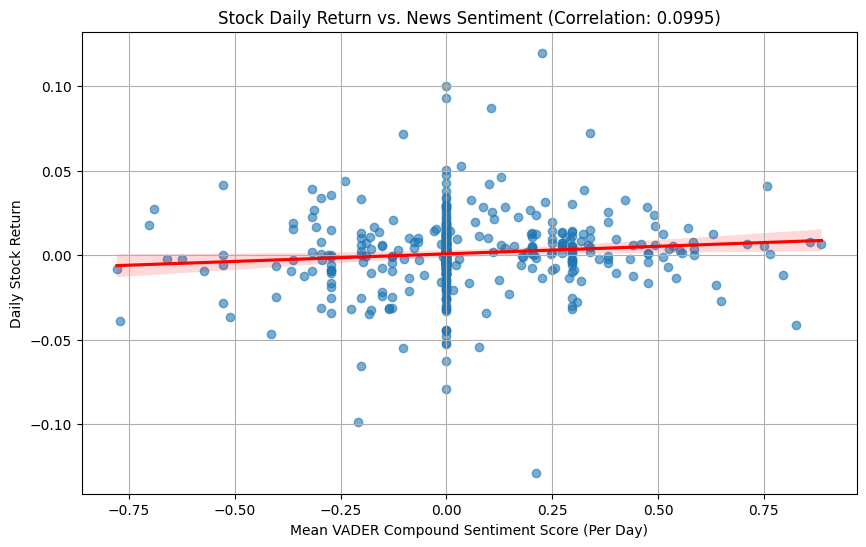

In [10]:
# Cell 10 — Calculate and Visualize Correlation (Task 3 Conclusion)
import matplotlib.pyplot as plt
import seaborn as sns # Import needed for sns.regplot

# 1. Calculate the Pearson Correlation Coefficient
correlation = final_df['Return'].corr(final_df['daily_vader_compound_mean'])

print(f"--- Correlation Result ---")
print(f"Pearson Correlation (Stock Return vs. Daily Mean Sentiment): {correlation:.4f}")
print("--------------------------\n")

# 2. Visualization (Scatter Plot with Regression Line)
plt.figure(figsize=(10, 6))
# Using seaborn for a clear scatter plot with a regression line
sns.regplot(x='daily_vader_compound_mean', y='Return', data=final_df, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.title(f'Stock Daily Return vs. News Sentiment (Correlation: {correlation:.4f})')
plt.xlabel('Mean VADER Compound Sentiment Score (Per Day)')
plt.ylabel('Daily Stock Return')
plt.grid(True)
plt.show() # Use plt.show() for notebook display
# plt.savefig('daily_return_vs_sentiment_correlation.png')